Importing Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import graphviz
import warnings
warnings.filterwarnings('ignore')

Importing Dataset: TITANIC SURVIVAL PREDICTION

In [106]:
from google.colab import files
uploaded=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [108]:
df1 = pd.read_csv('Titanic-Dataset.csv', delimiter=',')
df1.dataframeName = 'Titanic-Dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 891 rows and 12 columns


In [109]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
df1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [112]:
df1.Age



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Data Visualization

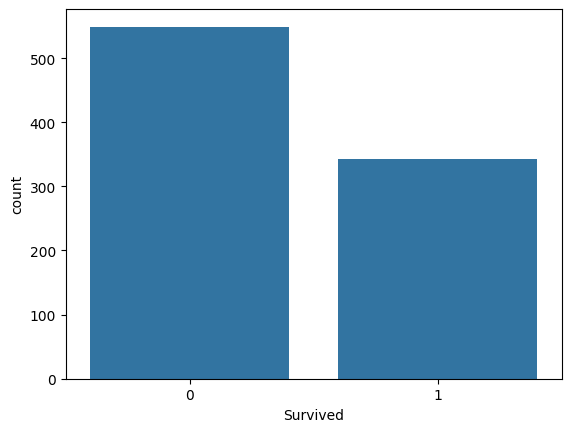

In [113]:
sns.countplot(data=df1, x='Survived')
death_percent=round((df1['Survived'].value_counts().values[0]/891)*100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

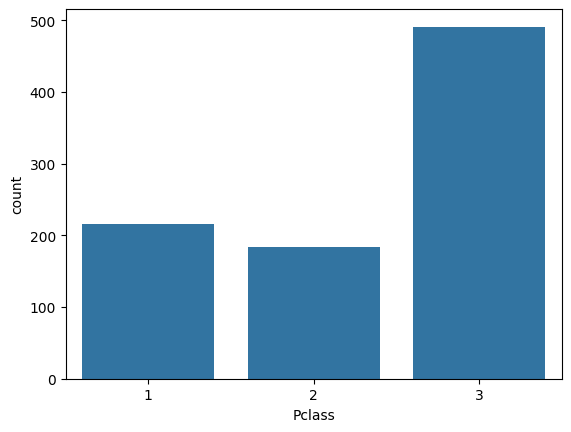

In [114]:
print((df1['Pclass'].value_counts()/891)*100)
sns.countplot(data=df1, x='Pclass')

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

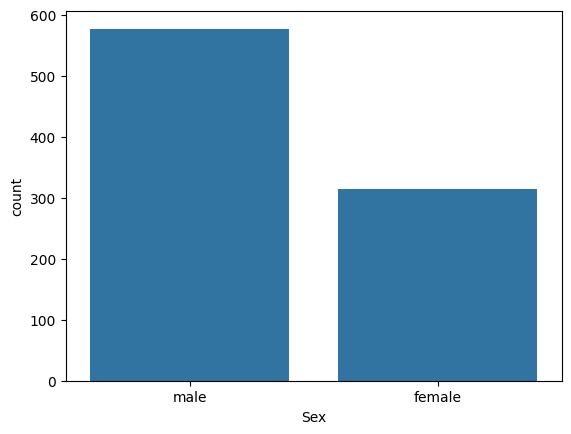

In [115]:
print((df1['Sex'].value_counts()/891)*100)
sns.countplot(data=df1, x='Sex')



SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

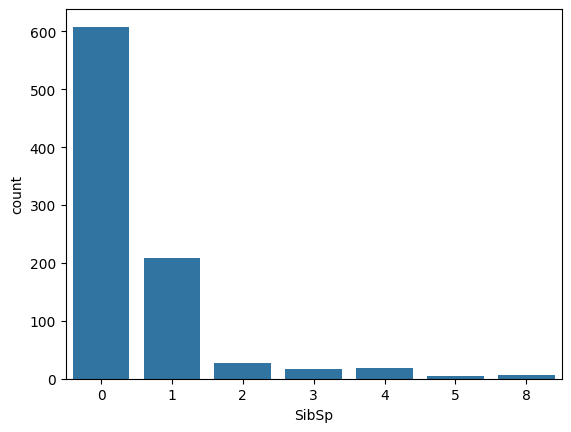

In [116]:
print(df1['SibSp'].value_counts())
sns.countplot(data = df1, x='SibSp')

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

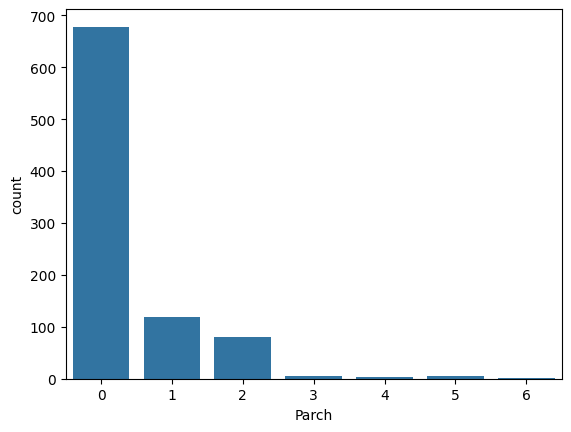

In [117]:
print((df1['Parch'].value_counts()/891)*100)
sns.countplot(data=df1, x='Parch')

Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

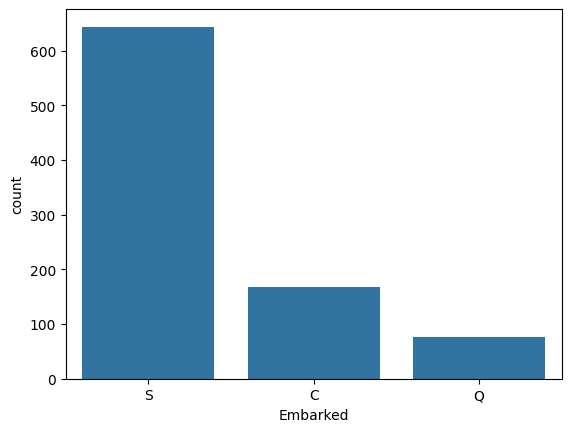

In [118]:
print((df1['Embarked'].value_counts()/891)*100)
sns.countplot(data=df1, x='Embarked')

0.38910778230082704
0.17827415364210353


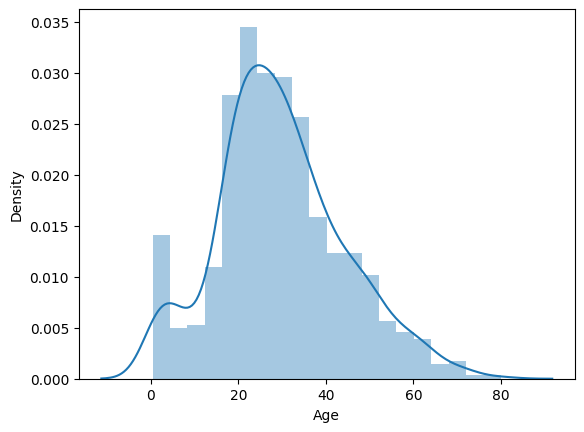

In [120]:
sns.distplot(df1['Age'])
print(df1['Age'].skew())
print(df1['Age'].kurt())

<Axes: xlabel='Age'>

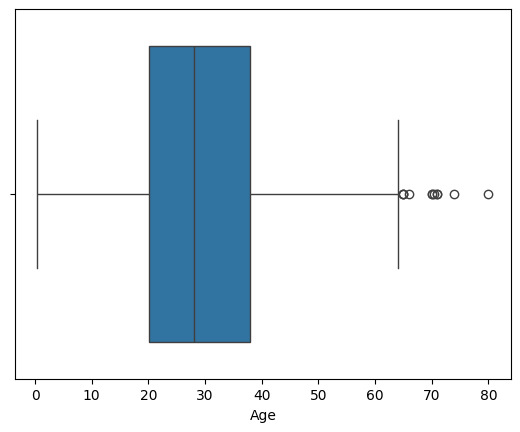

In [121]:
sns.boxplot(df1, x ='Age')


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


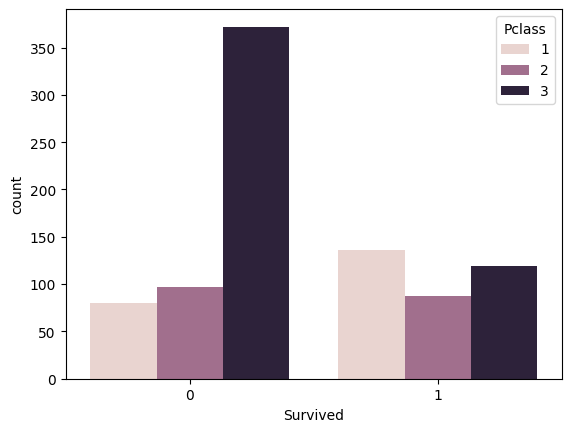

In [123]:
sns.countplot(df1, x='Survived', hue='Pclass')
pd.crosstab(df1['Pclass'], df1['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


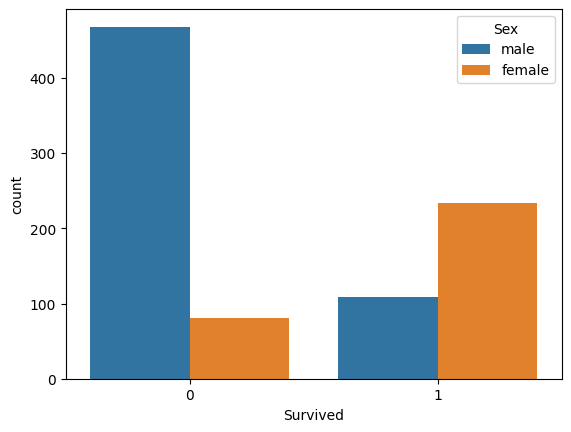

In [124]:
sns.countplot(df1, x='Survived', hue='Sex')
pd.crosstab(df1['Sex'], df1['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


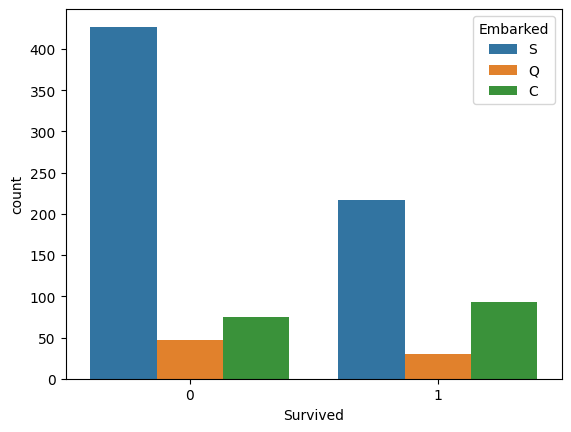

In [125]:
sns.countplot(df1, x='Survived', hue='Embarked')

pd.crosstab(df1['Embarked'], df1['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

<Axes: xlabel='Age', ylabel='Density'>

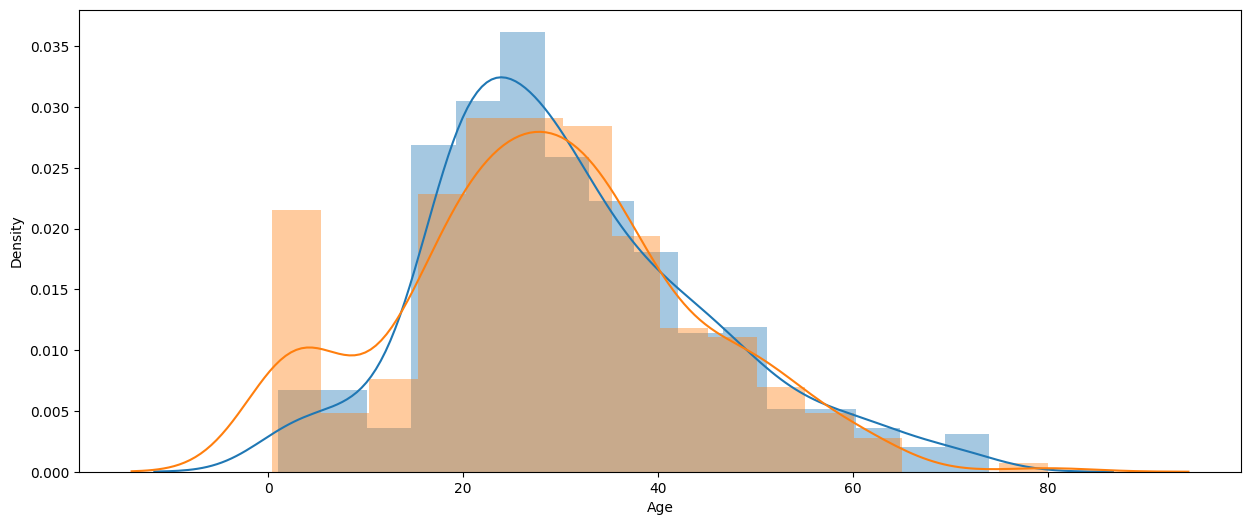

In [126]:
plt.figure(figsize=(15,6))
sns.distplot(df1[df1['Survived']==0]['Age'])
sns.distplot(df1[df1['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

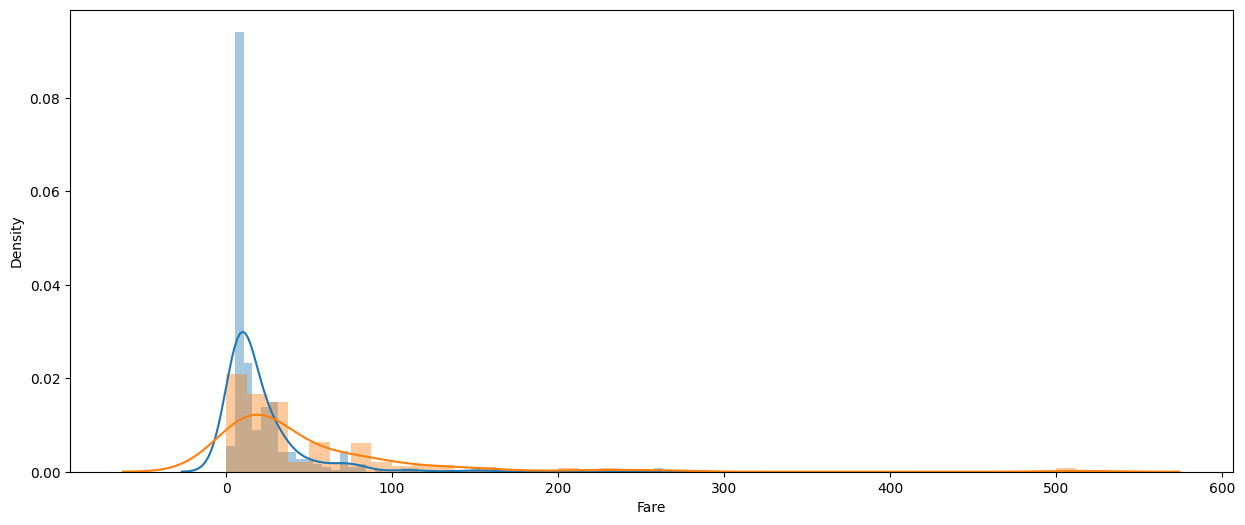

In [127]:
plt.figure(figsize=(15,6))
sns.distplot(df1[df1['Survived']==0]['Fare'])
sns.distplot(df1[df1['Survived']==1]['Fare'])

In [128]:
from sklearn import preprocessing as pp

In [129]:
df1['Fare'].head()


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [130]:
data_scaler=pp.MinMaxScaler(feature_range=(0,1))
fare_arr=df1[['Fare']]
fare_arr

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [131]:
fare_scaled=data_scaler.fit_transform(fare_arr)

In [132]:
fare_scaled

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429],
       [0.03259623],
       [0.05182215],
       [0.01571255],
       [0.06104473],
       [0.01533038],
       [0.03122992],
       [0.05684821],
       [0.02537431],
       [0.03513366],
       [0.01410226],
       [0.05074862],
       [0.02537431],
       [0.01567195],
       [0.06929139],
       [0.04113566],
       [0.06126432],
       [0.01410226],
       [0.51334181],
       [0.01537917],
       [0.01541158],
       [0.0541074 ],
       [0.28598956],
       [0.01512699],
       [0.02049464],
       [0.16038672],
       [0.10149724],
       [0.01411046],
       [0.01571255],
       [0.03513366],
       [0.02194234],
       [0.01849397],
       [0.04098927],
       [0.01541158],
       [0.08115719],
       [0.01537917],
       [0.01571255],
       [0.03025399],
       [0.015

In [134]:
df1['fare_scaled']=fare_scaled
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  fare_scaled  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


Dropping the Cabin column beacuse it contains Null values

In [135]:
col_to_drop=['Name','Cabin']
df1=df1.drop(col_to_drop,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  fare_scaled  891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [136]:
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
 10  fare_scaled  712 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 66.8+ KB


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [138]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
print(df1['Sex'].unique())

[1 0]


In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])
print(df1['Embarked'].unique())

[2 0 1]


In [140]:
df1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_scaled
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0.014151
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,0.139136
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,0.015469
3,4,1,1,0,35.0,1,0,113803,53.1000,2,0.103644
4,5,0,3,1,35.0,0,0,373450,8.0500,2,0.015713


In [141]:
x=df1.drop(['Survived','Ticket','Fare','PassengerId'],axis=1)
y=df1['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((569, 7), (143, 7))

In [142]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,fare_scaled
0,3,1,22.0,1,0,2,0.014151
1,1,0,38.0,1,0,0,0.139136
2,3,0,26.0,0,0,2,0.015469
3,1,0,35.0,1,0,2,0.103644
4,3,1,35.0,0,0,2,0.015713


ML Model Learning

In [143]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'BN': GaussianNB(),
    'RBF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = (2*tp)/(2*tp + fp + fn)
    precision = tp/(tp+fp)

    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity, #recall
        'Specificity': specificity,
        'F1 Score': f1,
        'Precision': precision,

    }

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Sensitivity: {result['Sensitivity']}")
    print(f"Specificity: {result['Specificity']}")
    print(f"F1 Score: {result['F1 Score']}")
    print()

Model: KNN
Accuracy: 0.7412587412587412
Precision: 0.75
Sensitivity: 0.5901639344262295
Specificity: 0.8536585365853658
F1 Score: 0.6605504587155964

Model: SVM
Accuracy: 0.6083916083916084
Precision: 0.7777777777777778
Sensitivity: 0.11475409836065574
Specificity: 0.975609756097561
F1 Score: 0.2

Model: BN
Accuracy: 0.7482517482517482
Precision: 0.7450980392156863
Sensitivity: 0.6229508196721312
Specificity: 0.8414634146341463
F1 Score: 0.6785714285714286

Model: RBF
Accuracy: 0.8181818181818182
Precision: 0.8070175438596491
Sensitivity: 0.7540983606557377
Specificity: 0.8658536585365854
F1 Score: 0.7796610169491526

Model: DT
Accuracy: 0.7692307692307693
Precision: 0.6944444444444444
Sensitivity: 0.819672131147541
Specificity: 0.7317073170731707
F1 Score: 0.7518796992481203

Model: XGBoost
Accuracy: 0.8041958041958042
Precision: 0.7704918032786885
Sensitivity: 0.7704918032786885
Specificity: 0.8292682926829268
F1 Score: 0.7704918032786885



In [145]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

models = {
    'ET': ExtraTreesClassifier(),
    'LIGHTGBM': LGBMClassifier(),
    'RC': RidgeClassifier(),
     'LR': LogisticRegression(),
    'gb': GradientBoostingClassifier(),
    'catboost': CatBoostClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = (2*tp)/(2*tp + fp + fn)
    precision = tp/(tp+fp)

    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1,
        'Precision': precision,

    }
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Sensitivity: {result['Sensitivity']}")
    print(f"Specificity: {result['Specificity']}")
    print(f"F1 Score: {result['F1 Score']}")

    print()

[LightGBM] [Info] Number of positive: 227, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398946 -> initscore=-0.409861
[LightGBM] [Info] Start training from score -0.409861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Among different ML algorithms, "GradientBoostingClassifier" outperforms with the highest accuracy.

In [147]:
new_passenger = [[0,0,43.0,1,0,1,0.103644]]
model=KNeighborsClassifier()
model.fit(X_train,y_train)
model.predict(X_test)
prediction = model.predict(new_passenger)
print("Survived Prediction:", prediction[0])

Survived Prediction: 1
